<a href="https://colab.research.google.com/github/manojlevi007/Dynamic-Input-Component-/blob/main/Copy_of_Time_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Daily_Public_Transport_Passenger_Boardings_By_Ticket_Type_20240513.csv")
df.info()
print()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1778 non-null   object
 1   MyWay         1778 non-null   int64 
 2   Paper Ticket  1778 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 41.8+ KB

            Date  MyWay  Paper Ticket
0     01/07/2019  66215          4325
1     15/09/2023  63800          7349
2     28/12/2021   9994          1882
3     11/01/2023  43769          3991
4     11/09/2021   3810           685
...          ...    ...           ...
1773  19/01/2023  46083          4622
1774  16/08/2023  70115          6955
1775  10/01/2022  21932          2315
1776  04/05/2020  14842           854
1777  26/07/2023  69067          6811

[1778 rows x 3 columns]


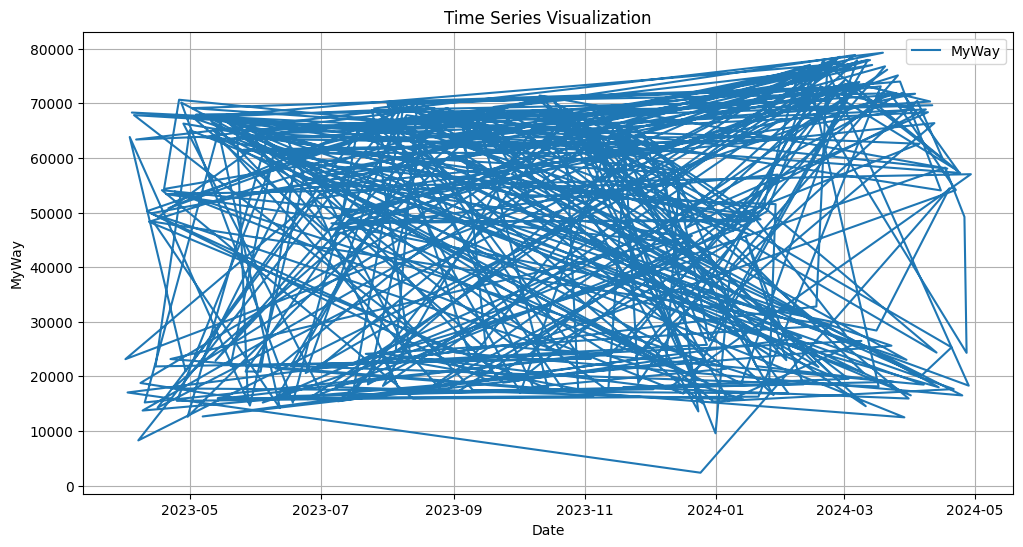

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Forecast for the next 7 days:
395    45445.248782
396    50745.814261
397    39412.290050
398    56921.442727
399    56222.302410
400    53532.414539
401    55872.801808
Name: predicted_mean, dtype: float64


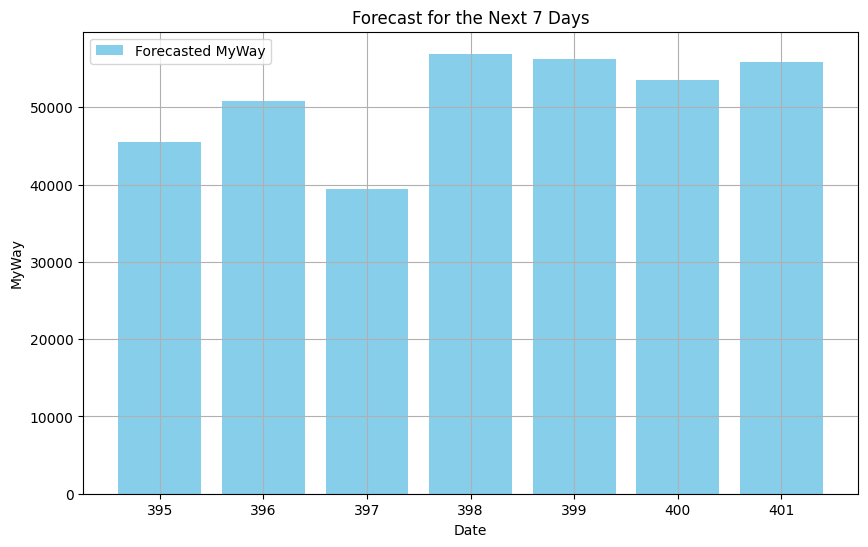

In [ ]:
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and Prepare Data
data = pd.read_csv('/content/Daily_Public_Transport_Passenger_Boardings_By_Ticket_Type_20240513.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')  # Specify the correct date format
data.set_index('Date', inplace=True)
data = data.loc['2023-04-01':'2024-04-29']  # Filter data for the specified time range

# Time Series Visualization
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['MyWay'], label='MyWay')
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('MyWay')
plt.legend()
plt.grid(True)
plt.show()

# Modeling
# SARIMA parameters (order, seasonal_order) need to be chosen based on data characteristics and ACF/PACF plots
order = (1, 2, 2)
seasonal_order = (1, 1, 1, 12)  # seasonal order with a yearly seasonality
model = SARIMAX(data['MyWay'], order=order, seasonal_order=seasonal_order)
fit_model = model.fit()

# Forecasting
forecast = fit_model.forecast(steps=7)  # Forecasting next 7 days
print("Forecast for the next 7 days:")
print(forecast)

forecast = fit_model.forecast(steps=7)  # Forecasting next 7 days

# understanding Visualization of Forecast in  a better way
plt.figure(figsize=(10, 6))
#plt.(forecast.index, forecast, color='skyblue', label='Forecasted MyWay')
plt.bar(forecast.index, forecast, color='skyblue', label='Forecasted MyWay')
plt.title('Forecast for the Next 7 Days')
plt.xlabel('Date')
plt.ylabel('MyWay')
plt.legend()
plt.grid(True)
plt.show()





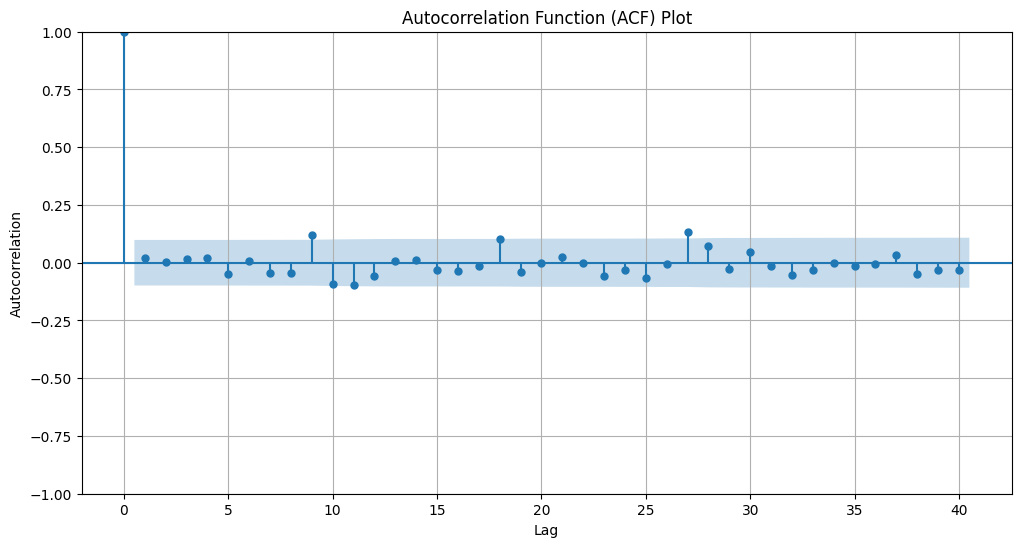

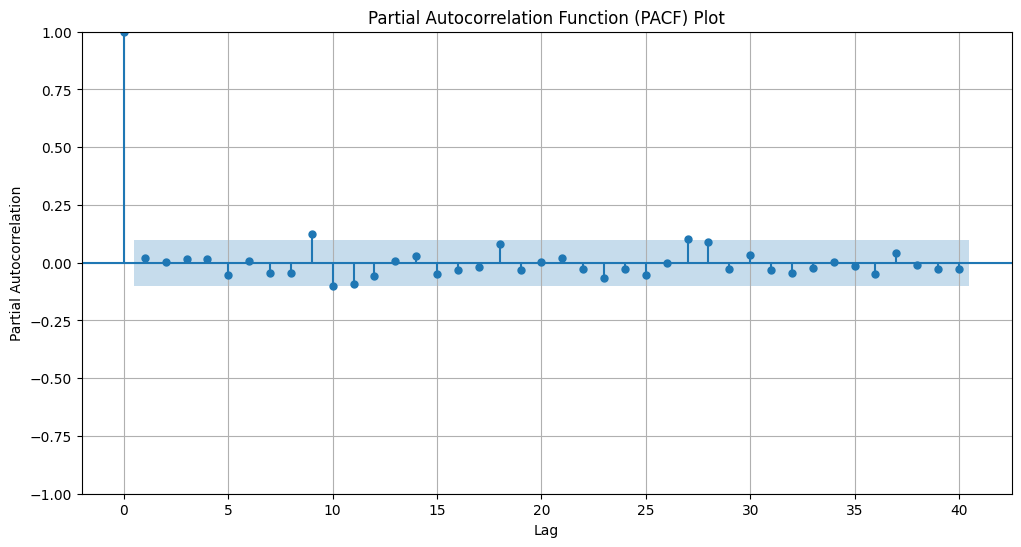

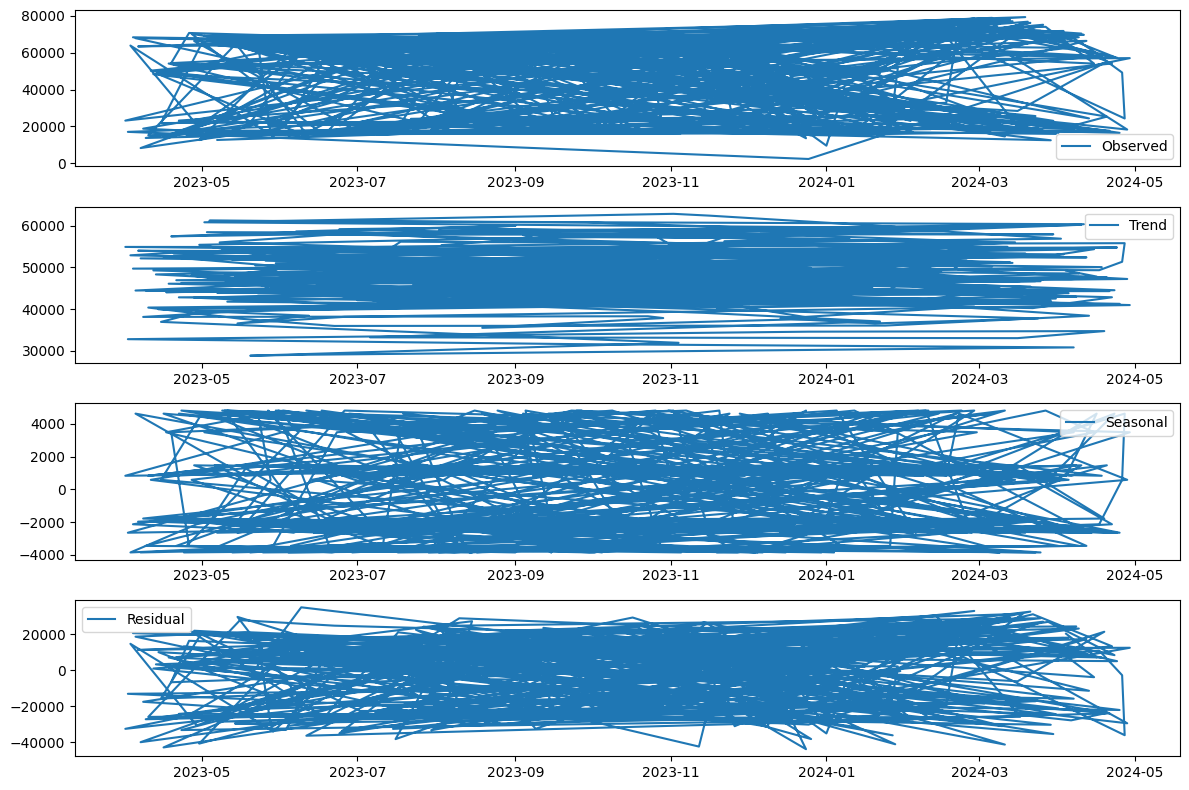

In [ ]:
# Importing required libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Additional Visualizations
# Autocorrelation Function (ACF) Plot
plt.figure(figsize=(12, 6))
plot_acf(data['MyWay'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Partial Autocorrelation Function (PACF) Plot
plt.figure(figsize=(12, 6))
plot_pacf(data['MyWay'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

# Seasonal Decomposition Plot
decomposition = seasonal_decompose(data['MyWay'], model='additive', period=12)  # Assuming a seasonal period of 12 months
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data.index, decomposition.observed, label='Observed')
plt.legend()
plt.subplot(412)
plt.plot(data.index, decomposition.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(data.index, decomposition.seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(data.index, decomposition.resid, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()


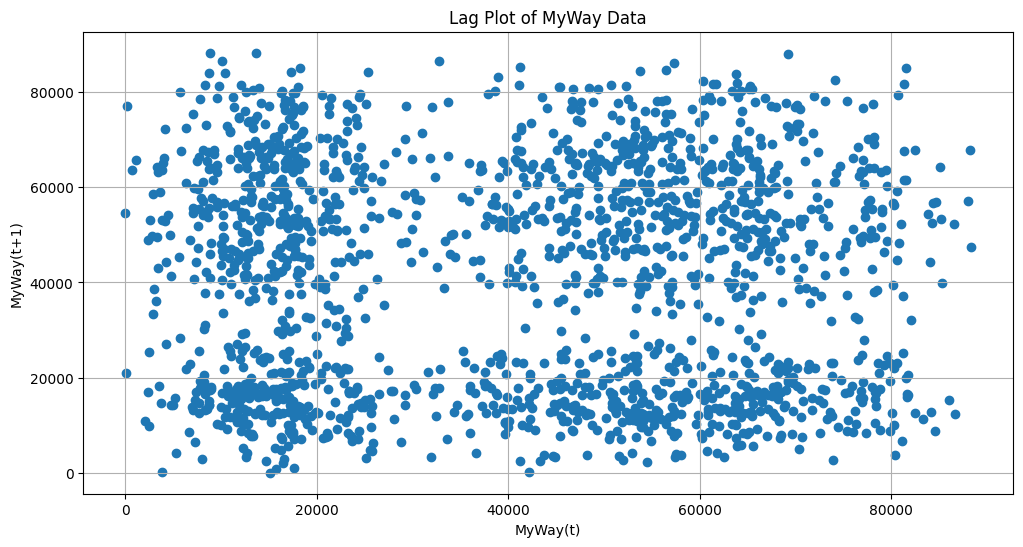

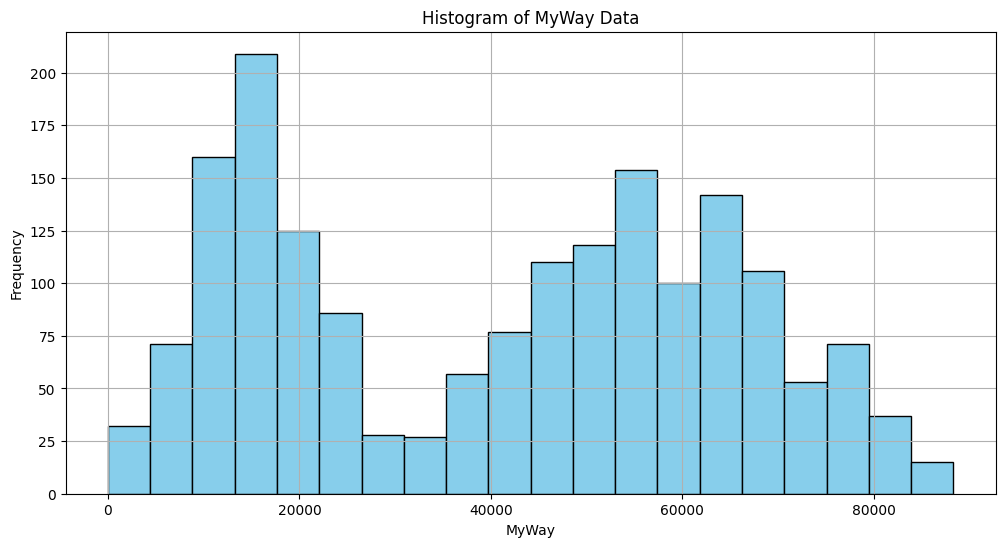

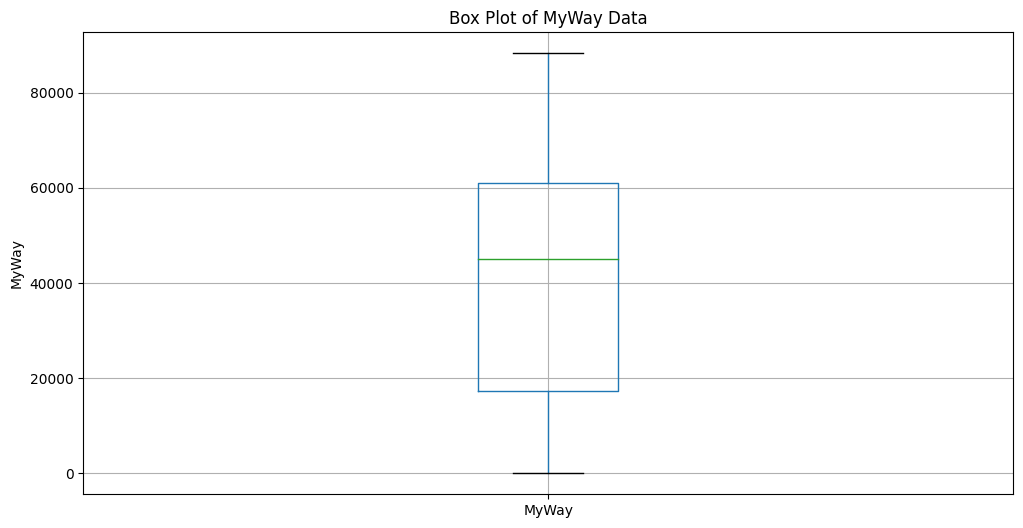

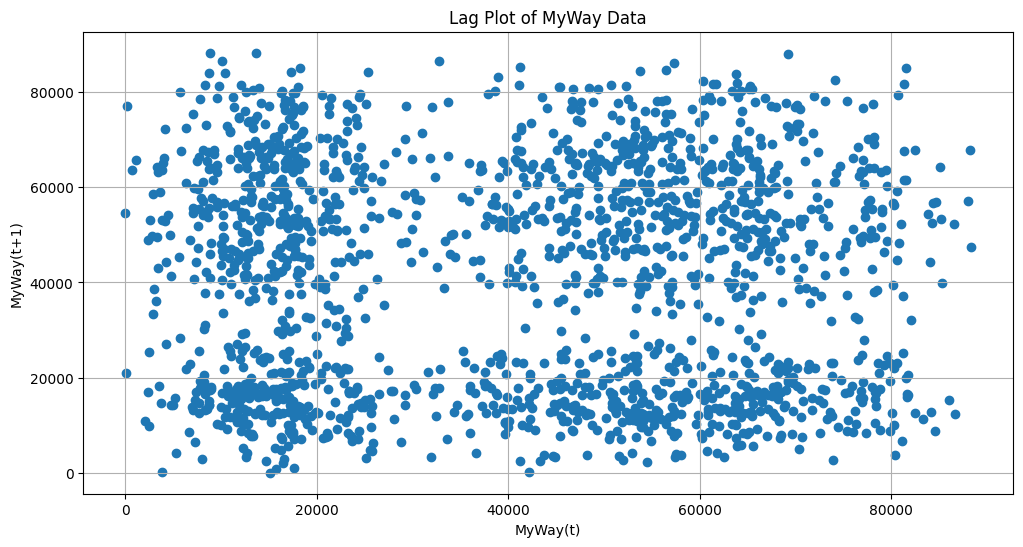

In [ ]:
#  Additional Visualizations - Linear Plots
# Histogram
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot  # Import lag_plot function from pandas.plotting

# Your code for loading and preparing data

# Lag Plot (or Scatter Plot)
plt.figure(figsize=(12, 6))
lag_plot(data['MyWay'])
plt.title('Lag Plot of MyWay Data')
plt.xlabel('MyWay(t)')
plt.ylabel('MyWay(t+1)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(data['MyWay'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of MyWay Data')
plt.xlabel('MyWay')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box Plot
plt.figure(figsize=(12, 6))
data.boxplot(column='MyWay')
plt.title('Box Plot of MyWay Data')
plt.ylabel('MyWay')
plt.grid(True)
plt.show()

# Lag Plot (or Scatter Plot)
plt.figure(figsize=(12, 6))
lag_plot(data['MyWay'])
plt.title('Lag Plot of MyWay Data')
plt.xlabel('MyWay(t)')
plt.ylabel('MyWay(t+1)')
plt.grid(True)
plt.show()
